In [3]:
import cv2
import matplotlib.pyplot as plt
import os
import sys
import random
import PIL
import pandas as pd
import numpy as np
from tqdm import tqdm

In [4]:
path_tr_img = 'ShelfImages/train'
path_metadata = 'grocerydataset/annotation.txt'

In [11]:
train_img_list = os.listdir(path_tr_img)
random.shuffle(train_img_list)

(2112, 2810, 3)


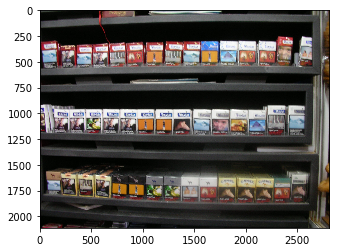

(1522, 1479, 3)


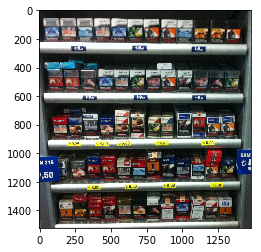

(2432, 3469, 3)


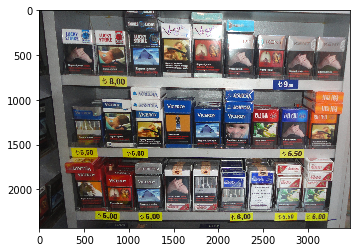

(1526, 2271, 3)


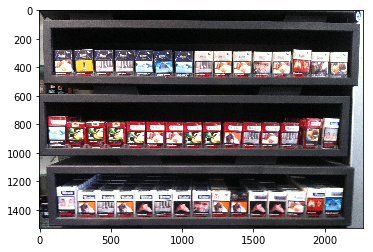

(2448, 2356, 3)


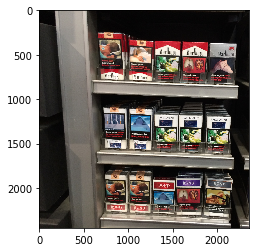

(2432, 2602, 3)


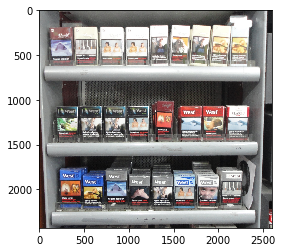

In [12]:
for img_name in train_img_list[:6]:
    img_ = plt.imread(os.path.join(path_tr_img,img_name))
    print(img_.shape)
    plt.imshow(img_)
    plt.show()

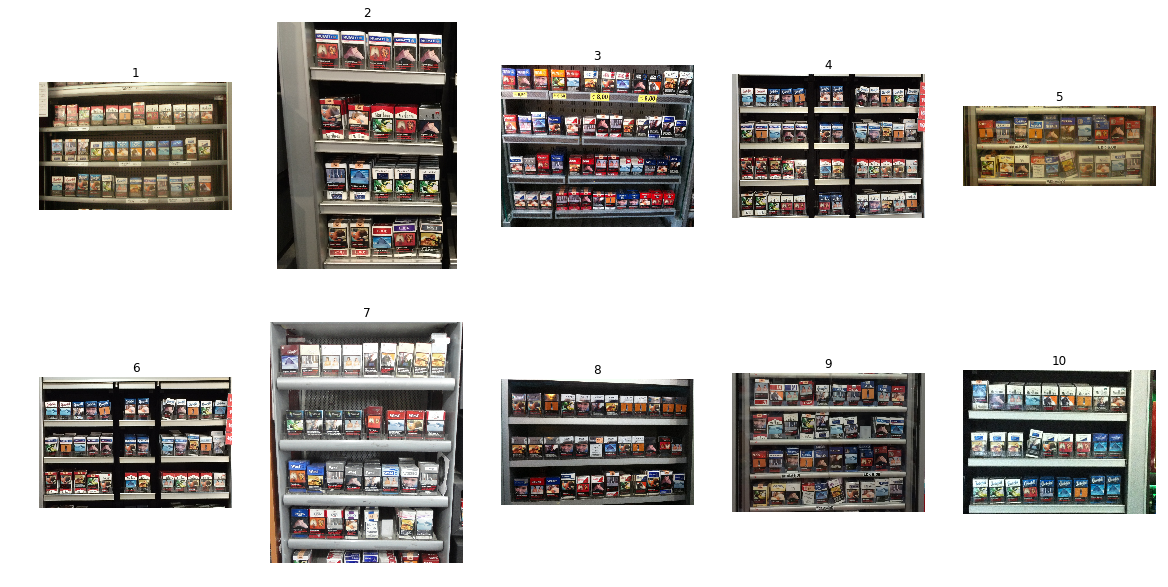

In [7]:
rows = 2
plt.figure(figsize=(20,10))
for id_, img_name in enumerate(train_img_list[:10]):  
    img_ = plt.imread(os.path.join(path_tr_img,img_name))
    plt.subplot(rows,5,id_+1)
    plt.title(id_+1)
    plt.axis('off')
    plt.imshow(img_)

# BBox on the images

In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import sys
import random
import PIL
import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
def get_image_size(df,path_sub_list):  
    width_dict = {}
    height_dict = {}
    print("Loading Images ...")
    for filename_ in tqdm(df['filename'].unique()):
        img_ = plt.imread(os.path.join(path_sub_list,filename_))
        width_dict[filename_] = img_.shape[1]
        height_dict[filename_] = img_.shape[0]  
    df['width'] = df['filename'].map(width_dict)
    df['height'] = df['filename'].map(height_dict)
    return df

In [3]:
def split_list_nChunks(list_, file_name, nChuncks = 5):
    nChunks_list = [list_[i * nChuncks:(i + 1) * nChuncks] for i in range(int(len(list_) / nChuncks))] 
    bbox_list = []
    for chunk in nChunks_list:
        bbox_list.append(chunk + [file_name])
    return bbox_list

In [4]:
def csv_for_tfrecords(df, sub_list, path_sub_list):
    df.columns = ['xmin','ymin','w','h','class','filename']
    df['xmax'] = df['xmin'].astype(int) + df['w'].astype(int)
    df['ymax'] = df['ymin'].astype(int) + df['h'].astype(int)
    df = df[df['filename'].isin(sub_list)]
    df = get_image_size(df, path_sub_list)
    df = df[['filename','width','height','class','xmin','ymin','xmax','ymax']]
    return df

In [5]:
def preprocess_metadata(path_metadata, subset_list_path):
    subset_img_list = os.listdir(subset_list_path)
    df = pd.read_csv(path_metadata, sep = "delimiter", header = None)
    df_splitted = pd.DataFrame()
    for row_id in range(df.shape[0]):
        box_info = split_list_nChunks(df.iloc[row_id,0].split(' ')[2:], df.iloc[row_id,0].split(' ')[0])
        df_ = pd.DataFrame(np.array(box_info))
        df_splitted = df_splitted.append(df_) 
    df_splitted = csv_for_tfrecords(df_splitted, subset_img_list, subset_list_path)
    df_splitted['class'] = 'Product'
    return df_splitted     

In [6]:
# path_tr_img = 'ShelfImages/train'
# path_ts_img = 'ShelfImages/test'
# path_metadata = 'grocerydataset/annotation.txt'

In [7]:
train = preprocess_metadata('grocerydataset/annotation.txt','ShelfImages/train')

/home/rahul/.conda/envs/penv/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
  1%|          | 2/283 [00:00<00:19, 14.40it/s]

Loading Images ...


100%|██████████| 283/283 [00:18<00:00, 15.50it/s]
/home/rahul/.conda/envs/penv/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/rahul/.conda/envs/penv/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [8]:
test = preprocess_metadata('grocerydataset/annotation.txt','ShelfImages/test')

/home/rahul/.conda/envs/penv/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
  3%|▎         | 2/71 [00:00<00:05, 12.18it/s]

Loading Images ...


100%|██████████| 71/71 [00:04<00:00, 15.97it/s]
/home/rahul/.conda/envs/penv/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/rahul/.conda/envs/penv/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [9]:
def annotate_image(np_image, img_name, metadata_):
    df_ = metadata_[metadata_['filename'] == img_name]
    for box_ in range(df_.shape[0]):
        x1 = int(df_.iloc[box_,:]['xmin'])
        y1 = int(df_.iloc[box_,:]['ymin'])
        x2 = int(df_.iloc[box_,:]['xmax'])
        y2 = int(df_.iloc[box_,:]['ymax'])
        cv2.rectangle(np_image, (x1, y1), (x2, y2), (0,255,0), 5)
    return np_image

<Figure size 864x576 with 0 Axes>

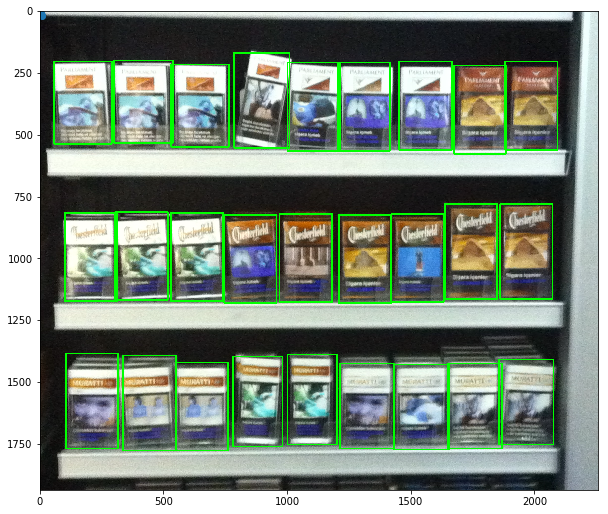

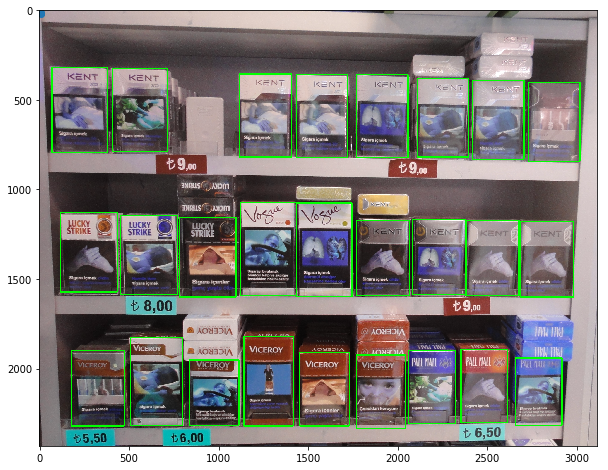

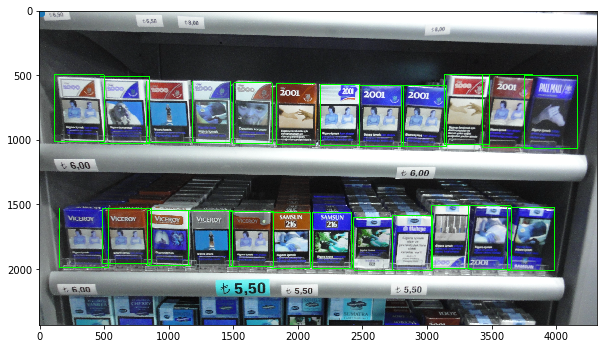

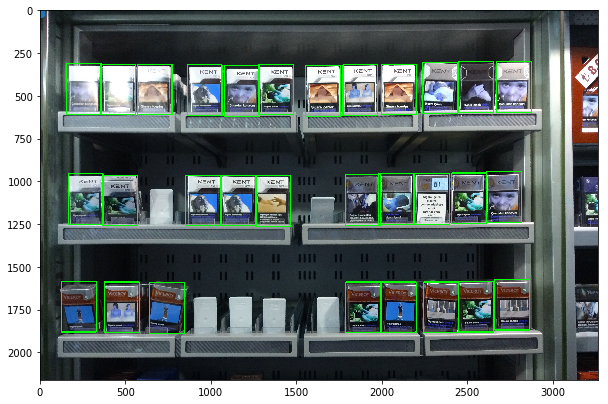

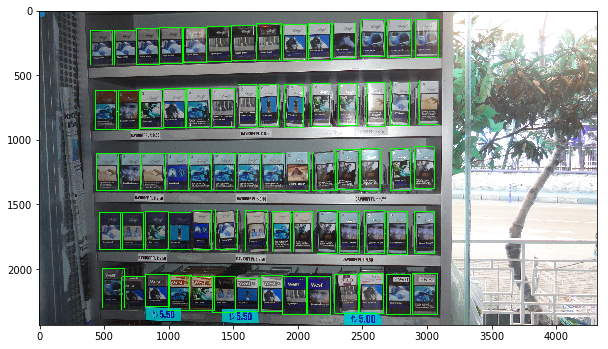

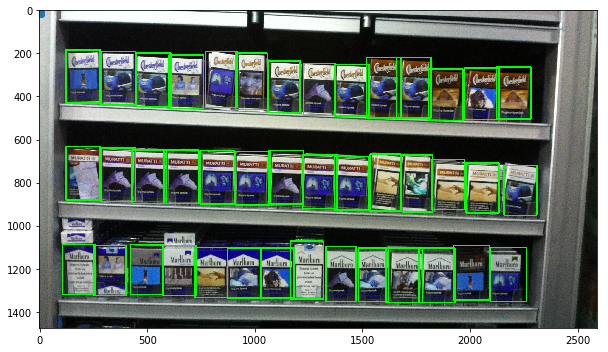

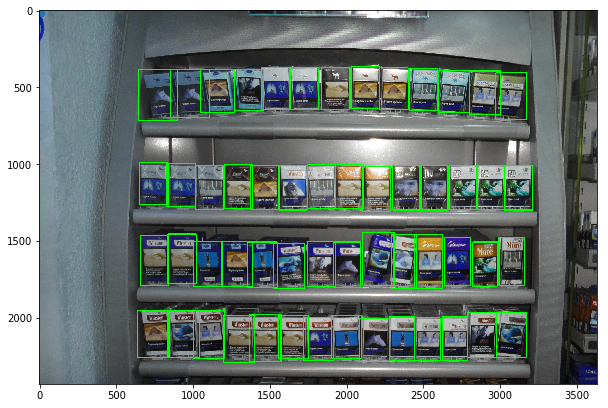

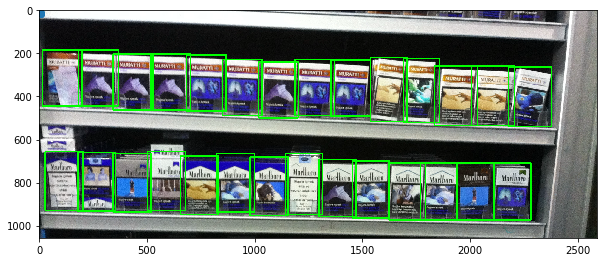

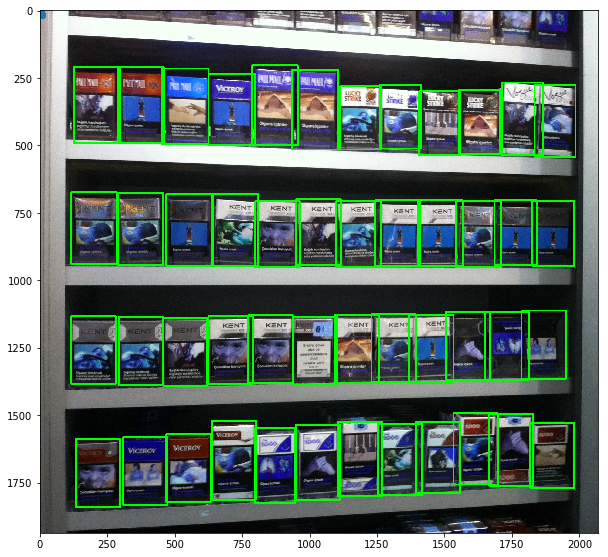

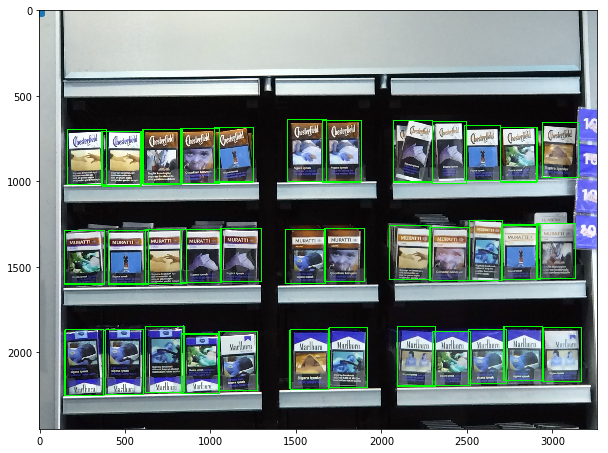

In [10]:
image_list = os.listdir('ShelfImages/train')
annotate = True
zoom = 2
fig = plt.figure()
for img_name in image_list[:10]:
    img_ = cv2.imread(os.path.join('ShelfImages/train',img_name))
    if annotate:
        img_ = annotate_image(img_, img_name, train)
    w, h = fig.get_size_inches()
    fig.set_size_inches(w * zoom, h * zoom)
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_aspect(1)
    ax.scatter(range(10), range(0,20,2))
    dpi = fig.get_dpi()  
    plt.imshow(img_)
    plt.show()

In [27]:
train.to_csv('train.csv', index = False)
test.to_csv('test.csv', index = False)